**Recommendation System Project**



Define the Objective

---



E-commerce companies use recommendation systems to provide suggestions to the customers.

---



They use item-item collaborative filtering, which scales to massive datasets and produces high quality recommendation systesin the real time.

---



This system is a kind of an information filtering system which seeks to predict the "rating" or preferences which user is interested in.

---



In [1]:
import pandas as pd
import io

data = pd.read_csv('ratings.csv')
data


C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,UserID,ProductID,Ratings,Timestamp
0,AKM1MP6P0OYPR,132793040,5,1365811200
1,A2NWSAGRHCP8N5,439886341,1,1367193600
2,A2WNBOD3WNDNKT,439886341,3,1374451200
3,A1GI0U4ZRJA8WN,439886341,1,1334707200
4,A1QGNMC6O1VW39,511189877,5,1397433600
...,...,...,...,...
1048570,A1H16CBCNEL4G3,B000IF51UQ,5,1356739200
1048571,A1C2OANTC49AQI,B000IF51UQ,5,1382486400
1048572,A2JL0387FDDFS,B000IF51UQ,5,1340409600
1048573,A2KIYE5RF0OEMY,B000IF51UQ,4,1391212800


**EDA**

In [2]:

# Data Cleaning
# Handle missing values (imputation or removal)
# Remove duplicates
# Normalize text fields (lowercase, remove special characters)
# Handle outliers (statistical detection methods)

In [3]:
# Display basic information about the dataset

shape = data.shape
shape

(1048575, 4)

In [4]:
column_names = data.columns.tolist()
column_names

['UserID', 'ProductID', 'Ratings', 'Timestamp']

In [5]:
First_few_rows = data.head()
First_few_rows

,UserID,ProductID,Ratings,Timestamp
0,AKM1MP6P0OYPR,132793040,5,1365811200
1,A2NWSAGRHCP8N5,439886341,1,1367193600
2,A2WNBOD3WNDNKT,439886341,3,1374451200
3,A1GI0U4ZRJA8WN,439886341,1,1334707200
4,A1QGNMC6O1VW39,511189877,5,1397433600


In [6]:
Missing_Values = data.isnull().sum()
Missing_Values

UserID       0
ProductID    0
Ratings      0
Timestamp    0
dtype: int64

In [7]:
datatype = data.dtypes
datatype

UserID       object
ProductID    object
Ratings       int64
Timestamp     int64
dtype: object

In [8]:
# Remove rows with missing values
# As only one missing value is present in given data set, so we can simply drop that value.

data_cleaned = data.dropna()
data_cleaned

,UserID,ProductID,Ratings,Timestamp
0,AKM1MP6P0OYPR,132793040,5,1365811200
1,A2NWSAGRHCP8N5,439886341,1,1367193600
2,A2WNBOD3WNDNKT,439886341,3,1374451200
3,A1GI0U4ZRJA8WN,439886341,1,1334707200
4,A1QGNMC6O1VW39,511189877,5,1397433600
...,...,...,...,...
1048570,A1H16CBCNEL4G3,B000IF51UQ,5,1356739200
1048571,A1C2OANTC49AQI,B000IF51UQ,5,1382486400
1048572,A2JL0387FDDFS,B000IF51UQ,5,1340409600
1048573,A2KIYE5RF0OEMY,B000IF51UQ,4,1391212800


In [9]:
# Remove duplicate rows (keep the first occurrence)

data_no_duplicates = data.drop_duplicates()

print(data_no_duplicates)

                 UserID   ProductID  Ratings   Timestamp
0         AKM1MP6P0OYPR   132793040        5  1365811200
1        A2NWSAGRHCP8N5   439886341        1  1367193600
2        A2WNBOD3WNDNKT   439886341        3  1374451200
3        A1GI0U4ZRJA8WN   439886341        1  1334707200
4        A1QGNMC6O1VW39   511189877        5  1397433600
...                 ...         ...      ...         ...
1048570  A1H16CBCNEL4G3  B000IF51UQ        5  1356739200
1048571  A1C2OANTC49AQI  B000IF51UQ        5  1382486400
1048572   A2JL0387FDDFS  B000IF51UQ        5  1340409600
1048573  A2KIYE5RF0OEMY  B000IF51UQ        4  1391212800
1048574  A1G9Q5UJ5Y7DES  B000IF51UQ        2  1390780800

[1048575 rows x 4 columns]


In [10]:
#Handle Outliers (Using Statistical Detection)

# Select only numeric columns for outlier detection
numeric_data = data.select_dtypes(include=['number'])

# Now apply IQR method safely
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

In [11]:
# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
data_no_outliers = data[~((numeric_data < lower_bound) | (numeric_data > upper_bound)).any(axis=1)]

print(data_no_outliers)

                 UserID   ProductID  Ratings   Timestamp
0         AKM1MP6P0OYPR   132793040        5  1365811200
1        A2NWSAGRHCP8N5   439886341        1  1367193600
2        A2WNBOD3WNDNKT   439886341        3  1374451200
3        A1GI0U4ZRJA8WN   439886341        1  1334707200
4        A1QGNMC6O1VW39   511189877        5  1397433600
...                 ...         ...      ...         ...
1048570  A1H16CBCNEL4G3  B000IF51UQ        5  1356739200
1048571  A1C2OANTC49AQI  B000IF51UQ        5  1382486400
1048572   A2JL0387FDDFS  B000IF51UQ        5  1340409600
1048573  A2KIYE5RF0OEMY  B000IF51UQ        4  1391212800
1048574  A1G9Q5UJ5Y7DES  B000IF51UQ        2  1390780800

[1048575 rows x 4 columns]


In [12]:
# Normalize Numerical Features
# Normalization scales numerical data to a standard range (e.g., 0-1 or mean=0, std=1).

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# **Select only numerical columns**
numeric_cols = data.select_dtypes(include=[np.number])

# **Min-Max Normalization**
minmax_scaler = MinMaxScaler()
data_minmax = pd.DataFrame(minmax_scaler.fit_transform(numeric_cols), columns=numeric_cols.columns)

# **Standardization**
standard_scaler = StandardScaler()
data_standard = pd.DataFrame(standard_scaler.fit_transform(numeric_cols), columns=numeric_cols.columns)

print("Min-Max Normalized Data:\n", data_minmax)
print("\nStandard Scaled Data:\n", data_standard)

Min-Max Normalized Data:
          Ratings  Timestamp
0           1.00   0.918389
1           0.00   0.921191
2           0.50   0.935902
3           0.00   0.855342
4           1.00   0.982487
...          ...        ...
1048570     1.00   0.900000
1048571     1.00   0.952189
1048572     1.00   0.866900
1048573     0.75   0.969877
1048574     0.25   0.969002

[1048575 rows x 2 columns]

Standard Scaled Data:
           Ratings  Timestamp
0        0.733652   1.071708
1       -2.124861   1.084372
2       -0.695604   1.150857
3       -2.124861   0.786772
4        0.733652   1.361392
...           ...        ...
1048570  0.733652   0.988601
1048571  0.733652   1.224465
1048572  0.733652   0.839010
1048573  0.019024   1.304405
1048574 -1.410233   1.300448

[1048575 rows x 2 columns]


In [13]:
#Data Splitting
#Train-Test Split (Common ratios: 80-20)
#We can split data into training and testing sets using train_test_split from scikit-learn.

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


# **Split into Train (80%) and Test (20%)**
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

print("Train Data:\n", train_data)
print("\nTest Data:\n", test_data)


Train Data:
                 UserID   ProductID  Ratings   Timestamp
408561   AOBWXRF0FYRME  B0001VGFKW        2  1280448000
70143   A1MJWOYNJSZPPJ  B00004Z913        5  1013817600
708782  A2W2ZXT36PIHND  B000A7B9V2        3  1140048000
572694   AU56R0S1T9QWC  B0006PUDQK        5  1207440000
774181   AZAYTATW5I5P1  B000BR3OHI        5  1176249600
...                ...         ...      ...         ...
259178  A15EZKDQCIG9B0  B00008X5DE        3  1282521600
365838  A3ACJFFFKHLZ0P  B00015GYU4        4  1153785600
131932  A2QMXR7HR12SWL  B0000630TO        1  1077321600
671155   ASI8O23YMQJJJ  B0009MCNX6        5  1316044800
121958  A2K7IB28PYPUE1  B00005T3JX        5  1006732800

[838860 rows x 4 columns]

Test Data:
                 UserID   ProductID  Ratings   Timestamp
781974  A1RCGK44YXNBBB  B000BU8ZZQ        5  1247011200
937737  A2SUPG5GOZAIAJ  B000FK9WAE        5  1173484800
907828  A2NWUCVIZLX6WZ  B000F4T4TY        4  1149811200
784628  A12DPYI5RO4CQM  B000BV8604        5  132408

In [14]:
# Splitting Features (X) and Target (y)
# separate features (X) and the target variable (y).

# Define Features (X) and Target (y)
import pandas as pd
data = pd.read_csv('ratings.csv')

# Assuming 'rating' is your target column name
target_column_name = 'Ratings'  # Replace 'rating' with your actual target column name if different

# Get a list of all column names
all_columns = data.columns.tolist()

# Remove the target column from the list to get feature columns
feature_columns = [col for col in all_columns if col != target_column_name]

# Create features (X) and target (y)
X = data[feature_columns]  # Features
y = data[target_column_name]  # Target variable


# Split data into 80% Train and 20% Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Target Shape:", y_train.shape)
print("Testing Target Shape:", y_test.shape)

Training Features Shape: (838860, 3)
Testing Features Shape: (209715, 3)
Training Target Shape: (838860,)
Testing Target Shape: (209715,)


In [15]:
#Data Cleaning and Preparation:


# Import required libraries
import pandas as pd
import numpy as np
from scipy.stats import zscore


# Step 1: Check for missing values
print("Missing Values:\n", data.isnull().sum())


# Verify missing values are handled
print("\nMissing Values After Imputation:\n", data.isnull().sum())

# Step 2: Check data types
print("\nData Types Before Correction:\n", data.dtypes)

# Example of correcting data types if necessary (uncomment and customize)
# data['Column_Name'] = data['Column_Name'].astype(float)

# Step 3: Handle duplicates
duplicates = data.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

# Drop duplicates if any
if duplicates > 0:
    data = data.drop_duplicates()

# Step 4: Outlier Detection
# Using Z-score for outlier detection
numerical_data = data.select_dtypes(include=[np.number])
z_scores = np.abs(zscore(numerical_data))

# Set threshold for z-score (commonly 3)
outliers = (z_scores > 3).any(axis=1)
print(f"\nNumber of outliers detected: {outliers.sum()}")

# Optionally, drop outliers or handle them
# data = data[~outliers]

# Step 5: Summary of Cleaned Data
print("\nSummary of Cleaned Data:")
print(data.info())
print(data.describe())


Missing Values:
 UserID       0
ProductID    0
Ratings      0
Timestamp    0
dtype: int64

Missing Values After Imputation:
 UserID       0
ProductID    0
Ratings      0
Timestamp    0
dtype: int64

Data Types Before Correction:
 UserID       object
ProductID    object
Ratings       int64
Timestamp     int64
dtype: object

Number of duplicate rows: 0

Number of outliers detected: 4

Summary of Cleaned Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   UserID     1048575 non-null  object
 1   ProductID  1048575 non-null  object
 2   Ratings    1048575 non-null  int64 
 3   Timestamp  1048575 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 32.0+ MB
None
            Ratings     Timestamp
count  1.048575e+06  1.048575e+06
mean   3.973379e+00  1.248822e+09
std    1.399329e+00  1.091615e+08
min    1.000000e+00  9.127296e+08
25%  

In [16]:
# Scaling numerical features using StandardScaler and MinMaxScaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Select numerical columns (only 'Ratings' in this case)
numerical_cols = ["Ratings"]  # Changed to only include 'Ratings'

# Initialize scalers
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

# Apply Standard Scaling
scaled_standard = scaler_standard.fit_transform(data[numerical_cols])

# Apply Min-Max Scaling
scaled_minmax = scaler_minmax.fit_transform(data[numerical_cols])

# Convert scaled data back to DataFrames for easier comparison
scaled_standard_df = pd.DataFrame(scaled_standard, columns=numerical_cols)
scaled_minmax_df = pd.DataFrame(scaled_minmax, columns=numerical_cols)

# Display first few rows of scaled data
scaled_standard_df.head(), scaled_minmax_df.head()

(    Ratings
 0  0.733652
 1 -2.124861
 2 -0.695604
 3 -2.124861
 4  0.733652,
    Ratings
 0      1.0
 1      0.0
 2      0.5
 3      0.0
 4      1.0)

In [19]:
#Encoding Techniques:


# Encoding categorical variables
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = ["UserID","ProductID", "Ratings"]

# One-Hot Encoding for categorical variables with < 5 unique categories
# Change 'df' to 'data' to refer to your DataFrame
ohe_cols = [col for col in categorical_cols if data[col].nunique() < 5]
df_ohe = pd.get_dummies(data, columns=ohe_cols, drop_first=True)  # Change 'df' to 'data'

# Label Encoding for categorical variables with >= 5 unique categories
le_cols = [col for col in categorical_cols if data[col].nunique() >= 5]  # Change 'df' to 'data'
le = LabelEncoder()

for col in le_cols:
    df_ohe[col] = le.fit_transform(df_ohe[col])

# Display the first few rows of the encoded DataFrame
df_ohe.head()

,UserID,ProductID,Ratings,Timestamp
0,697755,9,4,1365811200
1,346429,99,0,1367193600
2,396486,99,2,1374451200
3,95545,99,0,1334707200
4,153472,103,4,1397433600


In [20]:
#Feature Selection:



from sklearn.ensemble import IsolationForest

# Assuming 'data' is your DataFrame
df = data.copy()  # Create a copy of your original data to avoid modifying it directly

# Fit Isolation Forest to detect outliers
iso = IsolationForest(contamination=0.05, random_state=42)
outliers = iso.fit_predict(df[numerical_cols])

# Remove outliers
df = df[outliers == 1]  # Keep only inliers
print("Data after removing outliers:", df.shape)

Data after removing outliers: (1048575, 4)


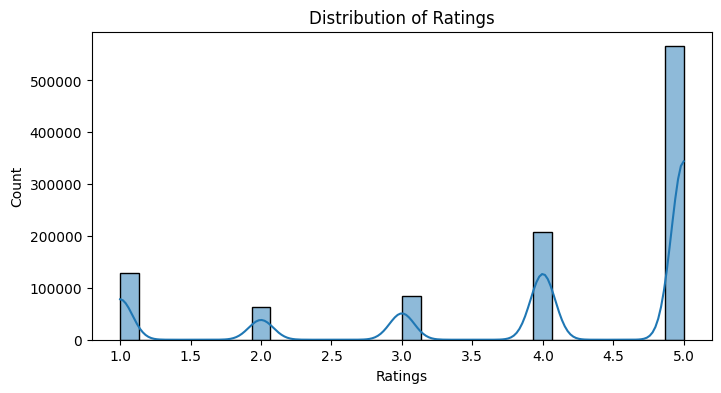

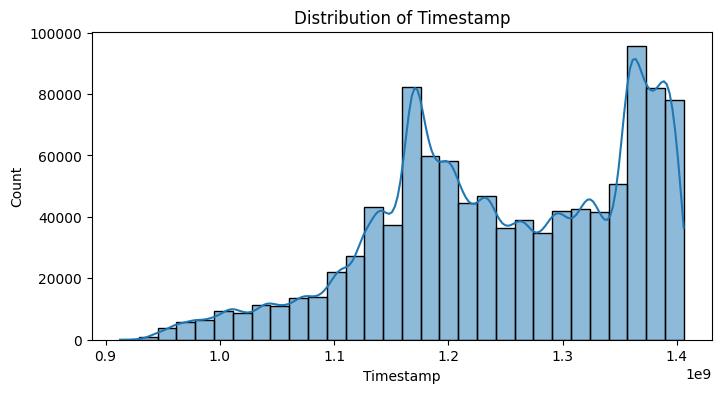

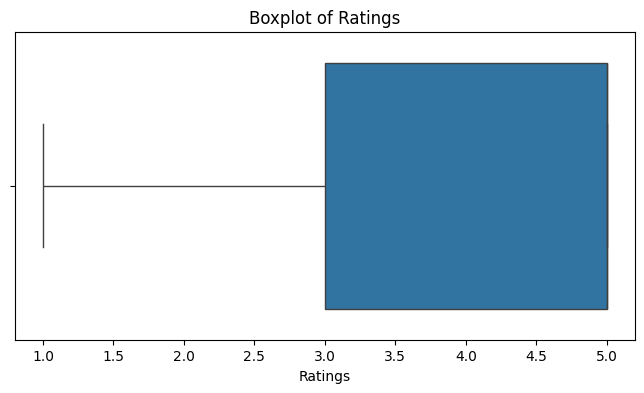

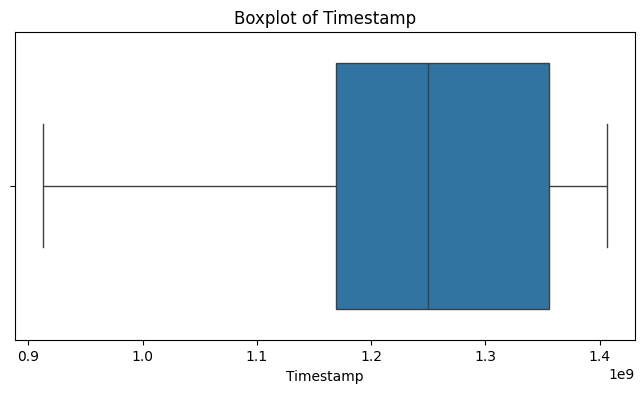

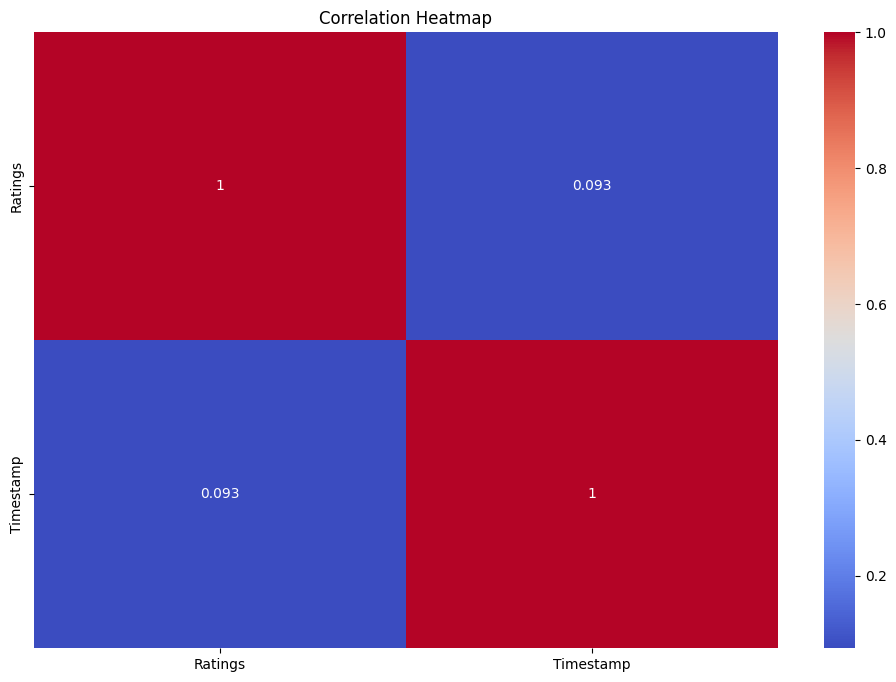

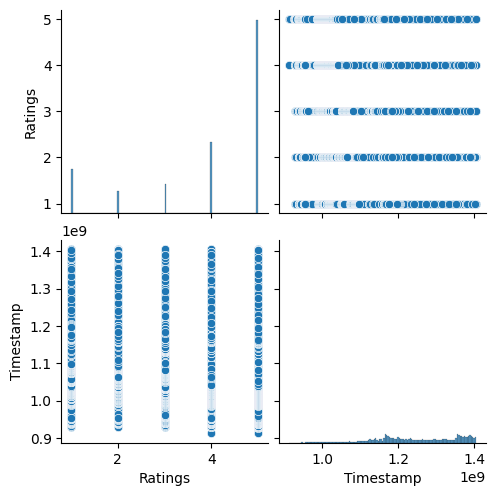

In [21]:
#Data Visualization:

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # Import numpy

# Distribution of numerical variables
for column in data.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[column], kde=True, bins=30)
    plt.title(f"Distribution of {column}")
    plt.show()

# Boxplot for numerical variables
for column in data.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[column])
    plt.title(f"Boxplot of {column}")
    plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
# Select only numerical columns for correlation
numerical_data = data.select_dtypes(include=[np.number])
correlation_matrix = numerical_data.corr()  # Calculate correlation on numerical data
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Pair plot for numerical data
sns.pairplot(data.select_dtypes(include=[np.number]))
plt.show()

**Checking the density of the rating matrix**

In [22]:
import pandas as pd
import numpy as np
data = pd.read_csv("formatted.csv")

#Creating the interaction matrix of products and users based on ratings and replacing NaN value with 0
final_ratings_matrix = data.pivot(index = 'User_ID', columns ='Item_ID', values = 'Ratings').fillna(0)
print('Shape of final_ratings_matrix: ', final_ratings_matrix.shape)

#Finding the number of non-zero entries in the interaction matrix 
given_num_of_ratings = np.count_nonzero(final_ratings_matrix)
print('given_num_of_ratings = ', given_num_of_ratings)

#Finding the possible number of ratings as per the number of users and products
possible_num_of_ratings = final_ratings_matrix.shape[0] * final_ratings_matrix.shape[1]
print('possible_num_of_ratings = ', possible_num_of_ratings)

#Density of ratings
density = (given_num_of_ratings/possible_num_of_ratings)
density *= 100
print ('density: {:4.2f}%'.format(density))

final_ratings_matrix.head()

Shape of final_ratings_matrix:  (249, 40)
given_num_of_ratings =  249
possible_num_of_ratings =  9960
density: 2.50%


Item_ID,0132793040,0321732944,0439886341,0511189877,0528881469,0558835155,059400232X,0594012015,0594017343,0594017580,...,0777700018,0840017677,0879393742,089933623X,0899336795,094339676X,0970407998,0970408005,0972683275,101
User_ID,,,,,,,,,,,,,,,,,,,,,
A107S4MT25VXQ5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A11E2USO989A37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0
A132P6YSJSI5G2,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A14KUMEJ094IZ3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A14V9YT3C4QRPW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0


## Rank Based Recommendation System

In [23]:
# Calculate the average rating for each product
average_rating = data.groupby('Item_ID')['Ratings'].mean()  # Removed .mean() after ['Ratings']

# Calculate the count of ratings for each product
count_rating = data.groupby('Item_ID')['Ratings'].count()  # Removed .count() after ['Ratings']

# Create a dataframe with calculated average and count of ratings
final_rating = pd.DataFrame({'avg_rating': average_rating, 'rating_count': count_rating})

# Sort the dataframe by average of ratings
final_rating = final_rating.sort_values(by='avg_rating', ascending=False)

final_rating.head()

,avg_rating,rating_count
Item_ID,,
0132793040,5.0,1
0594033934,5.0,2
094339676X,5.0,1
0777700018,5.0,2
0594549558,5.0,1


In [24]:
#defining a function to get the top n products based on highest average rating and minimum interactions
def top_n_products(final_rating, n, min_interaction):
    
    #Finding products with minimum number of interactions
    recommendations = final_rating[final_rating['rating_count']>min_interaction]
    
    #Sorting values w.r.t average rating 
    recommendations = recommendations.sort_values('avg_rating',ascending=False)
    
    return recommendations.index[:n]

In [25]:
# Recommending top 7 products with 10 interaction based on popularity
list(top_n_products(final_rating, 7, 10))

['0594033926',
 '0594481902',
 '0594451647',
 '0972683275',
 '0594481813',
 '0528881469']

## Collaborative Filtering based Recommendation System

**User Based collaborative filtering**

In [26]:
final_ratings_matrix.head()

Item_ID,0132793040,0321732944,0439886341,0511189877,0528881469,0558835155,059400232X,0594012015,0594017343,0594017580,...,0777700018,0840017677,0879393742,089933623X,0899336795,094339676X,0970407998,0970408005,0972683275,101
User_ID,,,,,,,,,,,,,,,,,,,,,
A107S4MT25VXQ5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A11E2USO989A37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0
A132P6YSJSI5G2,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A14KUMEJ094IZ3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A14V9YT3C4QRPW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0


In [27]:

final_ratings_matrix['user_index'] = np.arange(0, final_ratings_matrix.shape[0])
final_ratings_matrix.set_index(['user_index'], inplace=True)

# Actual ratings given by users
final_ratings_matrix.head()

Item_ID,0132793040,0321732944,0439886341,0511189877,0528881469,0558835155,059400232X,0594012015,0594017343,0594017580,...,0777700018,0840017677,0879393742,089933623X,0899336795,094339676X,0970407998,0970408005,0972683275,101
user_index,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0


**Function to find Similar users and their similarity score**

In [28]:
# defining a function to get similar users
def similar_users(user_index, interactions_matrix):
    similarity = []
    for user in range(0, interactions_matrix.shape[0]): #  .shape[0] gives number of rows
        
        #finding cosine similarity between the user_id and each user
        sim = cosine_similarity([interactions_matrix.loc[user_index]], [interactions_matrix.loc[user]])
        
        #Appending the user and the corresponding similarity score with user_id as a tuple
        similarity.append((user,sim))
        
    similarity.sort(key=lambda x: x[1], reverse=True)
    most_similar_users = [tup[0] for tup in similarity] #Extract the user from each tuple in the sorted list
    similarity_score = [tup[1] for tup in similarity] ##Extracting the similarity score from each tuple in the sorted list
   
    #Remove the original user and its similarity score and keep only other similar users 
    most_similar_users.remove(user_index)
    similarity_score.remove(similarity_score[0])
       
    return most_similar_users, similarity_score

**Finding out top 10 similar users to the user of index 3 and their similarity score**

In [29]:
from sklearn.metrics.pairwise import cosine_similarity

from sklearn.metrics import mean_squared_error

from scipy.sparse.linalg import svds

In [31]:
similar = similar_users(3,final_ratings_matrix)[0][0:10]
similar

[5, 40, 52, 62, 75, 103, 110, 111, 156, 175]

**Function to recommend post**

In [32]:

# defining the recommendations function to get recommendations by using the similar users' preferences
def recommendations(user_index, num_of_products, interactions_matrix):
    
    #Saving similar users using the function similar_users defined above
    most_similar_users = similar_users(user_index, interactions_matrix)[0]
    
    #Finding product IDs with which the user_id has interacted
    prod_ids = set(list(interactions_matrix.columns[np.where(interactions_matrix.loc[user_index] > 0)]))
    recommendations = []
    
    observed_interactions = prod_ids.copy()
    for similar_user in most_similar_users:
        if len(recommendations) < num_of_products:
            
            #Finding 'n' products which have been rated by similar users but not by the user_id
            similar_user_prod_ids = set(list(interactions_matrix.columns[np.where(interactions_matrix.loc[similar_user] > 0)]))
            recommendations.extend(list(similar_user_prod_ids.difference(observed_interactions)))
            observed_interactions = observed_interactions.union(similar_user_prod_ids)
        else:
            break
    
    return recommendations[:num_of_products]
     

**Recommend 10 products to user index 10 based on similarity based collaborative filtering**

In [33]:
recommendations(3,5,final_ratings_matrix)

['0594481902', '094339676X', '0528881469', '0972683275', '0840017677']

## Model based Collaborative Filtering: Singular Value Decomposition

In [34]:
from scipy.sparse import csr_matrix
final_ratings_sparse = csr_matrix(final_ratings_matrix.values)

In [35]:
# Singular Value Decomposition
U, s, Vt = svds(final_ratings_sparse, k = 35) # here k is the number of latent features

# Construct diagonal array in SVD
sigma = np.diag(s)

In [36]:
U.shape

(249, 35)

In [37]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 

# Predicted ratings
preds_df = pd.DataFrame(abs(all_user_predicted_ratings), columns = final_ratings_matrix.columns)
preds_df.head()
preds_matrix = csr_matrix(preds_df.values)

In [38]:
import numpy as np

def recommend_items(user_index, interactions_matrix, preds_matrix, num_recommendations):
    
    # Get the user's ratings from the actual and predicted interaction matrices
    user_ratings = interactions_matrix[user_index,:].toarray().reshape(-1)
    user_predictions = preds_matrix[user_index,:].toarray().reshape(-1)

    #Creating a dataframe with actual and predicted ratings columns
    temp = pd.DataFrame({'user_ratings': user_ratings, 'user_predictions': user_predictions})
    temp['Recommended Products'] = np.arange(len(user_ratings))
    temp = temp.set_index('Recommended Products')
    
    #Filtering the dataframe where actual ratings are 0 which implies that the user has not interacted with that product
    temp = temp.loc[temp.user_ratings == 0]   
    
    #Recommending products with top predicted ratings
    temp = temp.sort_values('user_predictions',ascending=False)#Sort the dataframe by user_predictions in descending order
    print('\nBelow are the recommended products for user(user_id = {}):\n'.format(user_index))
    print(temp['user_predictions'].head(num_recommendations))

In [39]:
#Enter 'user index' and 'num_recommendations' for the user
recommend_items(142,final_ratings_sparse,preds_matrix,7)


Below are the recommended products for user(user_id = 142):

Recommended Products
29    3.679988e-15
37    2.740410e-15
34    1.988745e-15
33    1.596244e-15
7     1.251987e-15
25    1.002693e-15
22    8.728312e-16
Name: user_predictions, dtype: float64


## Evaluating the model

In [40]:
final_ratings_matrix['user_index'] = np.arange(0, final_ratings_matrix.shape[0])
final_ratings_matrix.set_index(['user_index'], inplace=True)

# Actual ratings given by users
final_ratings_matrix.head(200)

Item_ID,0132793040,0321732944,0439886341,0511189877,0528881469,0558835155,059400232X,0594012015,0594017343,0594017580,...,0777700018,0840017677,0879393742,089933623X,0899336795,094339676X,0970407998,0970408005,0972683275,101
user_index,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
average_rating = final_ratings_matrix.mean()
average_rating.head()

Item_ID
0132793040    0.020080
0321732944    0.020080
0439886341    0.020080
0511189877    0.108434
0528881469    0.309237
dtype: float64

In [42]:
preds_df.head()

Item_ID,0132793040,0321732944,0439886341,0511189877,0528881469,0558835155,059400232X,0594012015,0594017343,0594017580,...,0777700018,0840017677,0879393742,089933623X,0899336795,094339676X,0970407998,0970408005,0972683275,101
0,1.340715e-17,2.987354e-16,4.785138e-16,1.904760e-16,3.442085e-16,2.018440e-16,3.271504e-16,4.527300e-16,4.700710e-17,1.076678e-16,...,1.284355e-17,1.017969e-15,4.176848e-17,7.937444e-16,6.802479e-17,7.965246e-17,2.744170e-16,6.060568e-17,8.118978e-17,3.441853e-16
1,3.347377e-15,9.251740e-17,2.988926e-17,1.878124e-15,6.203724e-16,8.309518e-17,4.610028e-18,1.797457e-15,1.304855e-17,2.366441e-17,...,7.140331e-16,1.413387e-16,1.176630e-15,6.889519e-16,1.441440e-16,5.000000e+00,4.165660e-16,2.075974e-15,3.254945e-16,3.467407e-15
2,1.429332e-16,2.031328e-16,2.219919e-16,6.173486e-17,2.000000e+00,5.518072e-17,1.814277e-28,5.896389e-17,3.887101e-16,5.554775e-17,...,4.775905e-17,2.019082e-16,6.211026e-18,1.245821e-16,7.741612e-17,6.993190e-17,4.559184e-18,6.188329e-17,5.636763e-16,8.211458e-16
3,8.401026e-16,4.901629e-16,2.206762e-16,5.340100e-16,8.466628e-16,7.783659e-16,5.910306e-18,2.355943e-16,1.092773e-15,7.035348e-16,...,4.958004e-17,1.148199e-15,2.678273e-16,1.415711e-15,2.420483e-17,3.109400e-16,3.730868e-17,7.683032e-19,2.211938e-15,5.964459e-16
4,4.782547e-17,7.591063e-17,4.017354e-16,2.621392e-16,7.422906e-17,7.427114e-17,8.014915e-28,1.001590e-15,1.102076e-16,6.620876e-16,...,1.221453e-16,1.053518e-16,5.562797e-17,1.249240e-15,1.590996e-15,5.849857e-17,3.659751e-21,2.192328e-15,4.000000e+00,5.983850e-17


In [43]:
avg_preds=preds_df.mean()
avg_preds.head()

Item_ID
0132793040    2.008032e-02
0321732944    2.008032e-02
0439886341    4.523623e-16
0511189877    1.084337e-01
0528881469    3.092369e-01
dtype: float64

In [44]:
rmse_df = pd.concat([average_rating, avg_preds], axis=1)
rmse_df.columns = ['Avg_actual_ratings', 'Avg_predicted_ratings']
rmse_df.head()

,Avg_actual_ratings,Avg_predicted_ratings
Item_ID,,
0132793040,0.020080,2.008032e-02
0321732944,0.020080,2.008032e-02
0439886341,0.020080,4.523623e-16
0511189877,0.108434,1.084337e-01
0528881469,0.309237,3.092369e-01


In [45]:
RMSE=mean_squared_error(rmse_df['Avg_actual_ratings'], rmse_df['Avg_predicted_ratings'], squared=False)
print(f'RMSE SVD Model = {RMSE} \n')

RMSE SVD Model = 0.004703141131983516 



C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [47]:
import pickle
with open("recommendation_model.pkl", "wb") as file:
    pickle.dump(preds_matrix, file)
